In [19]:
INPUT_DATA_IN_CBDB = "../../CGED DATA/CGED-Q_new_person_essential_columns_only_variences_cleaned_coded.csv"
INPUT_DATA_ALL = "../../CGED DATA/CGED-Q for Peter and Hongsu with person_id - August 31 2022.csv"

In [20]:
import pandas as pd

data_in_cbdb_df = pd.read_csv(INPUT_DATA_IN_CBDB, encoding='utf-8', sep='\t')
data_all_df = pd.read_csv(INPUT_DATA_ALL, encoding='utf-8', sep='\t') 
data_in_cbdb_filtered_df = data_in_cbdb_df[data_in_cbdb_df['flag'] != 'f']

C:\Users\sudos\AppData\Local\Temp\ipykernel_13912\2563527977.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_in_cbdb_df = pd.read_csv(INPUT_DATA_IN_CBDB, encoding='utf-8', sep='\t')
C:\Users\sudos\AppData\Local\Temp\ipykernel_13912\2563527977.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,13,18,22,24,25,26,30,31,32,38,39,40,41,42,43,44,45,46,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all_df = pd.read_csv(INPUT_DATA_ALL, encoding='utf-8', sep='\t')


In [21]:
print(data_in_cbdb_filtered_df.shape)

(1581409, 38)


In [22]:
# get year column from both dataframes, count the number of unique years information (it could be .25 .75 . 5 .0 which means different seasons)
# Sort the years and put them on a graph. x-axis will have two lines, one for the data in cbdb and one for the data in all
in_cbdb_data_year_df = data_in_cbdb_filtered_df['year'].value_counts().reset_index()
in_cbdb_data_year_df.columns = ['year', 'count']

all_data_year_df = data_all_df['year'].value_counts().reset_index()
all_data_year_df.columns = ['year', 'count']

# Convert 'year' column to numeric, forcing errors to NaN
all_data_year_df['year'] = pd.to_numeric(all_data_year_df['year'], errors='coerce')
in_cbdb_data_year_df['year'] = pd.to_numeric(in_cbdb_data_year_df['year'], errors='coerce')



In [23]:
# show the nan values for the years

print("Error in all_data_year_df", all_data_year_df[all_data_year_df['year'].isnull()])
print("Error in in_cbdb_data_year_df", in_cbdb_data_year_df[in_cbdb_data_year_df['year'].isnull()])

Error in all_data_year_df      year  count
279   NaN      4
Error in in_cbdb_data_year_df Empty DataFrame
Columns: [year, count]
Index: []


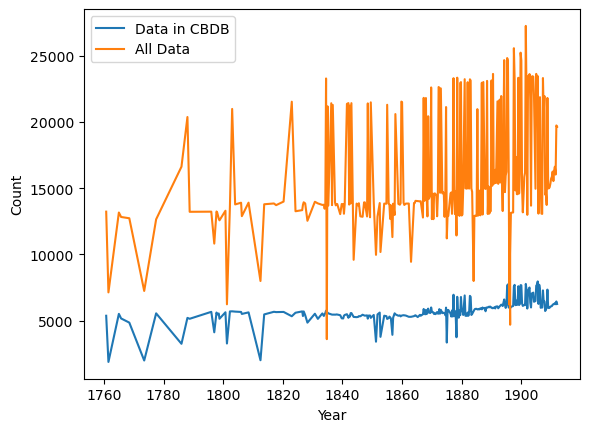

In [24]:
# Drop rows with NaN in the 'year' column
all_data_year_df = all_data_year_df.dropna(subset=['year'])
in_cbdb_data_year_df = in_cbdb_data_year_df.dropna(subset=['year'])

# Now sort by 'year'
all_data_year_df = all_data_year_df.sort_values(by='year')
in_cbdb_data_year_df = in_cbdb_data_year_df.sort_values(by='year')

# Continue with your plotting code
import matplotlib.pyplot as plt

plt.plot(in_cbdb_data_year_df['year'], in_cbdb_data_year_df['count'], label='Data in CBDB')
plt.plot(all_data_year_df['year'], all_data_year_df['count'], label='All Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

103,778 new persons from the Qing Dynasty Roster of Government Personnel (縉紳錄), with 14,347 alternate names, 112,934 biographical addresses, 89,516 entry records, and 1,581,409 postings. (Collaborator: CGED-Q project)